# PHYS20762 Project 3: Monte Carlo Techniques

## Neutron Transport and Scattering Through a Shielding Layer

Author: 10841151<br>
April 2023

------------------------------------------------------------------------------

Initialisation: importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

## Checking the accuracy of 'numpy.random.uniform()'

Initially we want to check that 'numpy.random.uniform()' produces a uniform distribution. We will do this by using 'numpy.random.uniform()' to generate a fixed number of points between 0 and 1, and plot these points in a histogram in order to check their uniformity. We will repeat this test for several numbers of points.

The mean of the values for n = 100 points is -0.0120646365355634
The mean of the values for n = 1000 points is 0.01252187583682724
The mean of the values for n = 10000 points is -0.008434352434916161
The mean of the values for n = 100000 points is 0.00023646569835957833


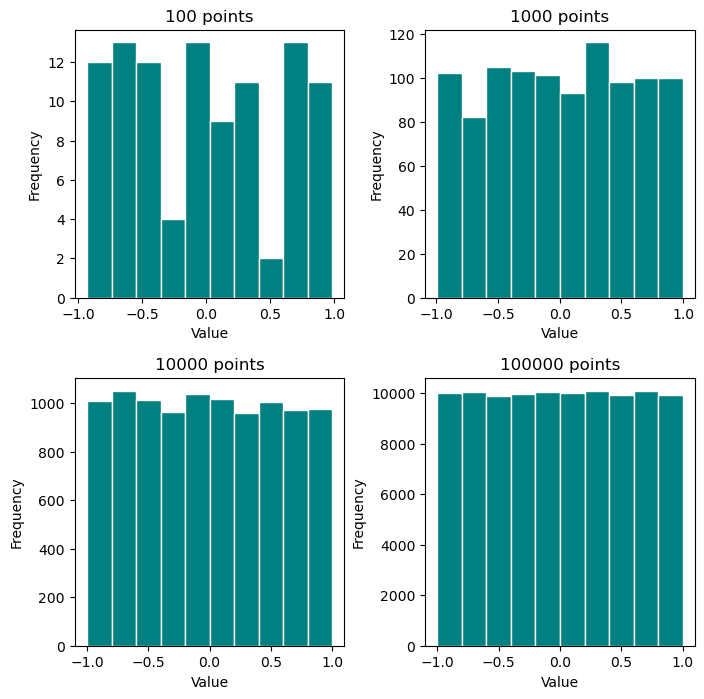

In [3]:
number_of_points_to_test = [100, 1000, 10000, 100000]
histograms_fig = plt.figure(figsize = [8, 8])
uniform_distribution_subplot_grid = gridspec.GridSpec(2, 2, wspace = 0.3, hspace = 0.3)

def generate_random_uniform_points_one_dimension(number_of_points):
    """
    Generates a 2D array of random uniformly distributed points between the values of -1 and 1 using numpy.random.uniform.
    The size of the array in each dimension is given by the number_of_points parameter.
    
    Parameters
    ----------
    number_of_points : float
        A parameter defining how big the 2D array should be. For example, if number_of_points = 10, the output will be a 
        10 x 10 array.
        
    Returns
    -------
    points: array
        A 2D array of uniform randomly distributed points. The size of this array is given by number_of_points.
    """
    
    points = np.random.uniform(low = -1.0, high = 1.0, size = (number_of_points))
    
    return points

for i in range(4):
    #create a flat 1D array of randomly generated points
    test_points = generate_random_uniform_points_one_dimension(number_of_points_to_test[i])
    test_points_array = test_points.flatten()
    
    #plotting the distribution of these points
    ax = histograms_fig.add_subplot(uniform_distribution_subplot_grid[i])
    ax.hist(test_points_array, color = 'teal', edgecolor = 'white')
    ax.set_title('{0} points'.format(number_of_points_to_test[i]))
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
    #finding the mean of the points
    mean = np.mean(test_points_array)
    print('The mean of the values for n = {0} points is {1}'.format(number_of_points_to_test[i], mean))

plt.show()

It can be seen from these results that the uniformity of the values produced by 'numpy.random.uniform' increases when the number of points generated increases.

## Generating random uniformly distrubuted points in 3D

<IPython.core.display.Javascript object>


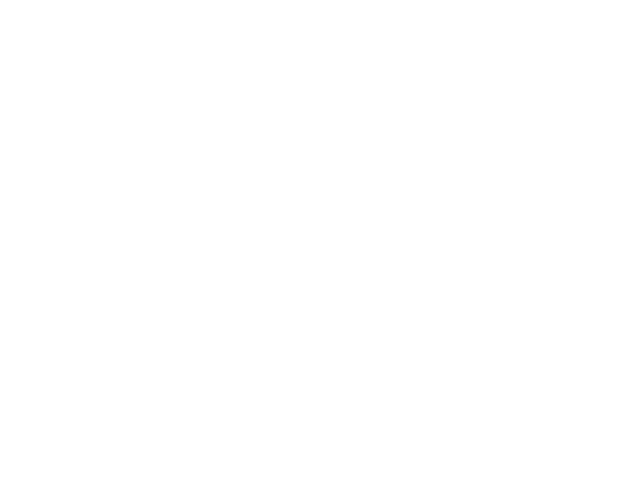

In [4]:
get_ipython().magic('matplotlib notebook')
fig = plt.figure()

def generate_random_uniform_points_three_dimensions(number_of_points):
    """
    Generates a 2D array of random uniformly distributed points between the values of 0 and 1 using numpy.random.uniform.
    The size of the array in each dimension is given by the number_of_points parameter.
    
    Parameters
    ----------
    number_of_points : float
        A parameter defining how big the 2D array should be. For example, if number_of_points = 10, the output will be a 
        10 x 10 array.
        
    Returns
    -------
    points: array
        A 2D array of uniform randomly distributed points. The size of this array is given by number_of_points.
    """
    
    xpoints = np.random.uniform(low = 0, high = 1.0, size = (number_of_points))
    ypoints = np.random.uniform(low = 0, high = 1.0, size = (number_of_points))
    zpoints = np.random.uniform(low = 0, high = 1.0, size = (number_of_points))
    
    return xpoints, ypoints, zpoints

euclidean_space_xpoints, euclidean_space_ypoints, euclidean_space_zpoints = \
    generate_random_uniform_points_three_dimensions(1000)

euclidean_space_graph = fig.add_subplot(111, projection = '3d')
euclidean_space_graph.scatter(euclidean_space_xpoints, euclidean_space_ypoints, euclidean_space_zpoints, color = 'teal')
euclidean_space_graph.set_xlabel('x')
euclidean_space_graph.set_ylabel('y')
euclidean_space_graph.set_zlabel('z')
plt.show()

It can be seen by examining this plot that there are no spectral issues caused by 'np.random.uniform()'.

## Demonstrating spectral issues caused by randssp

<IPython.core.display.Javascript object>


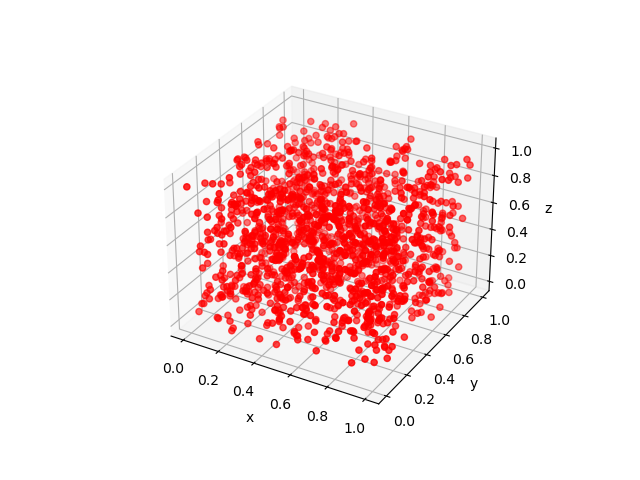

In [5]:
get_ipython().magic('matplotlib notebook')
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

def randssp(p,q):
    
    global m, a, c, x
        
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    
    return r

k = randssp(3, 1500)
ax.scatter(k[0, :], k[1, :], k[2, :], color='r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## exponential distribution

<IPython.core.display.Javascript object>


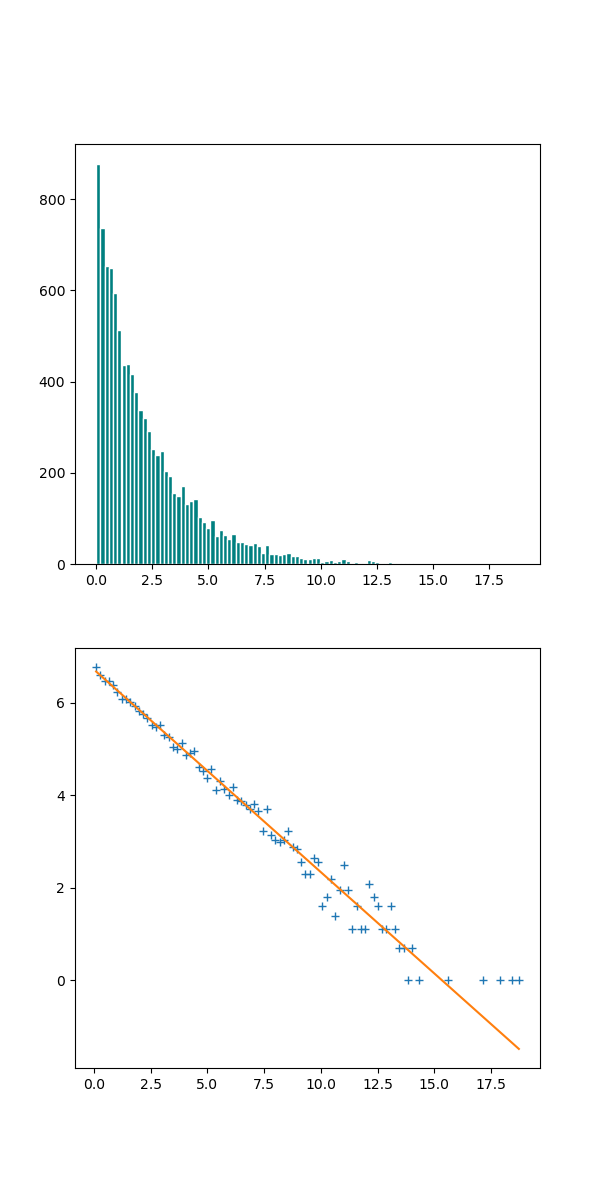

0.43816651446532673


In [6]:
fig = plt.figure(figsize = (6,12))
histogram = fig.add_subplot(211)
logplot = fig.add_subplot(212)

water_absorption_coeff = 0.6652
water_scattering_coeff = 103
water_density = 1 #g/cm ^3
molar_mass_water = 18.0153
estimated_attenuation_length_water = 0.45 #m

def sampling_exponential_distribution(mean_free_path, number_of_points):
    samples = np.random.uniform(low = 0, high = 1.0, size = (number_of_points))
    exponential_samples = (-1 * mean_free_path) * np.log(samples)
    
    return exponential_samples

def linear_function(x, m, c):
    y = (m * x) + c
    return y

estimated_mean_free_path_water = 1 / estimated_attenuation_length_water

#plotting histogram
water_histogram_points = sampling_exponential_distribution(estimated_mean_free_path_water, 10000)
water_histogram, bins = np.histogram(water_histogram_points, bins = 100)

histogram.hist(water_histogram_points, bins = bins, color = 'teal', edgecolor = 'white')

#plotting log plot
empty_bins = np.where(water_histogram == 0)
justified_water_population = np.delete(water_histogram, empty_bins)
justified_bins = np.delete(bins, empty_bins)

bin_centres = np.zeros((len(justified_bins) - 1))

for i in range(len(justified_bins) - 1):
    bin_centres[i] = (justified_bins[i+1] + justified_bins[i]) / 2

population_logs = np.log(justified_water_population)
logplot_parameters = np.polyfit(bin_centres, population_logs, 1, full = True, w = np.sqrt(justified_water_population))[0]

attenuation_coefficient = -1 * logplot_parameters[0]
print(attenuation_coefficient)

line_of_best_fit = linear_function(bin_centres, logplot_parameters[0], logplot_parameters[1])
plt.plot(bin_centres, population_logs, '+')
plt.plot(bin_centres, line_of_best_fit)


plt.show()

## Producing isotropic unit vectors

<IPython.core.display.Javascript object>


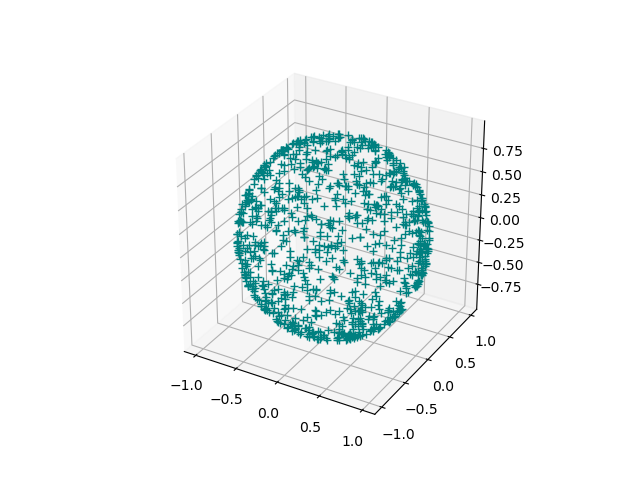

In [46]:
fig = plt.figure()
unit_vectors_plot = fig.add_subplot(111, projection = '3d')

def produce_unit_vectors(number_of_vectors, magnitude):
    
    arbitrary_value = np.random.uniform(low = 0, high = 1, size = number_of_vectors)
    theta = np.arccos(1 - (2 * arbitrary_value))
    
    phi = np.random.uniform(low = 0, high = (2 * np.pi), size = number_of_vectors)
    
    x = magnitude * np.sin(theta) * np.cos(phi)
    y = magnitude * np.sin(theta) * np.sin(phi)
    z = magnitude * np.cos(theta)
    
    vector_magnitude = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    
    return x, y, z
xvalues, yvalues, zvalues = produce_unit_vectors(1000, 1)

unit_vectors_plot.plot(xvalues, yvalues, zvalues, '+', color = 'teal')
unit_vectors_plot.set_box_aspect((1, 1, 1))
plt.show()

## Creating isotropic steps

<IPython.core.display.Javascript object>


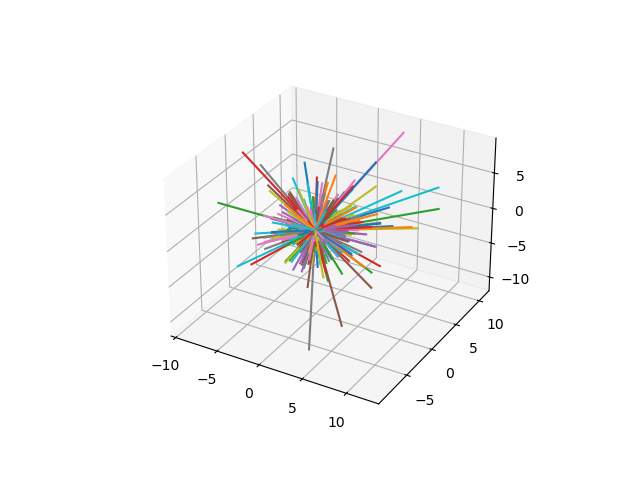

In [67]:
fig = plt.figure()
steps_graph = fig.add_subplot(111, projection = '3d')

distances = sampling_exponential_distribution(estimated_mean_free_path_water, 1000)
distance_xvalues = []
distance_yvalues = []
distance_zvalues = []

for i in range(len(distances)):
    x_coordinate, y_coordinate, z_coordinate = produce_unit_vectors(1, distances[i])

    distance_xvalues.append(x_coordinate)
    distance_yvalues.append(y_coordinate)
    distance_zvalues.append(z_coordinate)

    steps_graph.plot([0, x_coordinate], [0, y_coordinate], [0, z_coordinate])
    
plt.show()